<a href="https://colab.research.google.com/github/thingumajig/extractive_summary/blob/master/extractive_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# init

In [2]:
# %%capture
# !pip uninstall --quiet --yes tensorflow
# !pip install tensorflow-gpu==1.14.0

# !pip install tensorflow_text

!pip install --upgrade tensorflow-gpu
!pip install tensorflow-hub
!pip install tensorflow-text
!pip install scikit-learn
!pip install spacy
# !pip install sentencepiece==0.1.83
# !pip install tf-sentencepiece==0.1.83

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 450kB 50.7MB/s 
     |████████████████████████████████| 3.8MB 45.9MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

     |████████████████████████████████| 8.3MB 3.1MB/s 
     |████████████████████████████████| 421.8MB 39kB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
## important import!!
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow_text import SentencepieceTokenizer

import sys

src_path = 'extractive_summary'  

!test -d $src_path || git clone https://github.com/thingumajig/$src_path $src_path
%cd /content/$src_path
!git pull
%cd /content

if not src_path in sys.path:
  sys.path.insert(0, src_path)

# print(sys.path)

Cloning into 'extractive_summary'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 34 (delta 17), reused 19 (delta 8), pack-reused 0
Unpacking objects: 100% (34/34), done.
/content/extractive_summary
Already up to date.
/content


In [18]:
# !pip install en_core_web_sm==2.2.5
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


# Extractive summary


In [2]:
from extractive_summary import ExtractiveSummary, create_extractive_summary_gen
es = create_extractive_summary_gen()


Default GPU Device: /device:GPU:0
initialize model.
initialize model.
initialize model.


In [0]:
#@title Text


text = "Trump plots his defense following the historic rebuke he hopes to foil.  Washington (CNN). Historic? Yes. Rebuke? Not so much.  The House Judiciary Committee's vote Friday passing articles of impeachment against President Donald Trump was meant as extraordinary repudiation. The history was certainly there, and is weighing on the President. But it did not appear anyone felt rebuked at the White House. Minutes before the party-line vote was called, the man joining Trump at the center of the scandal -- his personal attorney Rudy Giuliani -- was seen ambling across the White House driveway toward the West Wing. \"Maybe he's here to go to the Christmas party with his son, who works at the White House,\" offered Kellyanne Conway, the President's counselor, when asked about Giuliani's presence. The party, according to the White House schedule, was set to begin at 8:15 p.m., a full 10-and-a-half hours after Giuliani arrived.  It was a remarkable display of recalcitrance in the face of the allegation at the center of the impeachment: that Trump and Giuliani were managing a pressure campaign on Ukraine to investigate political rivals. And it presaged a defiant path forward when Trump likely becomes the third president in US history to be impeached. As he ruefully awaits that ignoble distinction, Trump isn't showing any signs of regret or retreat. Instead, he is busying himself with a lifetime pursuit: putting on a show. Aware the looming impeachment trial in the Senate could amount to the most highly watched moment of his presidency, with his reputation and legacy at stake, Trump has offered strong views to his Republican allies about how he'd like his defense to unfold. At moments, it has appeared his vision for an extended, show-stopper trial will clash with the more staid plans being laid by Senate Majority Leader Mitch McConnell, with whom he has consulted over the past week. Even that halting coordination with the Senate's Republican leaders has prompted howls of outrage from Democrats, who say the efforts shatter the notion of senators as impartial jurors. In between furious blasts from his Twitter account -- including the highest-volume day of tweets of his presidency -- Trump has privately weighed who is the best lawyer to defend him during the Senate's upcoming trial. He's spent hours consulting which of his allies should go on television to spread word of his innocence. And he's mused at the parade of witnesses he'd like to see questioned, like Hunter Biden and the whistleblower, even as his Republican allies acknowledge the chances are small they appear during the trial itself.  Grilling top aides.  As Democrats and Republicans on the House Judiciary Committee argued bitterly and publicly this week, behind the scenes Trump was grilling his own top aides about what they were doing to stay on offense. At times he grew frustrated the White House attempts at messaging weren't leading the news cycle. Some of Trump's advisers say the plotting -- which one likened to producing a television show, much like Trump did before he became president -- was a welcome distraction from what is undoubtedly a low moment. He's already laid plans to respond next week on the day the House of Representatives plans to vote on impeachment articles. Trump has scheduled a \"Merry Christmas\" rally in Michigan; at last year's holiday event, Trump emerged from a chimney like Santa to a flurry of fake snow. (By comparison, then-President Bill Clinton delivered a six-minute address on the White House South Lawn after the House voted to impeach him). Afterward, Trump will spend the holidays at his Florida resort, where aides are expecting a less-than-restful vacation as he prepares for the Senate trial. On Friday, Trump said he's willing to entertain any length of proceeding, confident that the Republican-controlled Senate -- with McConnell and another top ally, Sen. Lindsey Graham, at the helm -- will acquit him in the end. \"I'll do long or short. I've heard Mitch, I've heard Lindsey. I think they are very much on agreement on some concept; I'll do whatever they want to do,\" Trump said in the Oval Office. \"It doesn't matter.\" Still, Trump said he \"wouldn't mind a long process\" because he'd like to see the intelligence whistleblower whose complaint sparked the impeachment proceedings testify. And he continued to insist the impeachment has benefited him politically, declaring both his poll numbers and Republican fundraising \"through the roof.\"  Size and scope of Senate trial.  How the trial ultimately will look remains a subject of debate among Senate Republicans, many of whom favor limiting the proceedings but still recognize Trump's desire to have his metaphorical day in court. McConnell and Trump's top lawyer sketched out a plan Thursday to coordinate closely for an impeachment trial but did not reach an agreement on a final strategy to defend Trump against charges of high crimes and misdemeanors, according to two sources familiar with the conversation. Trump has made clear he wants witnesses to testify, in person, while senators -- including McConnell in private -- have warned that going down that path could lead to a politically precarious slippery slope. Two people inside the White House predicted cooler heads will prevail and Trump will end up agreeing with McConnell in the end, who has privately advocated for a brief trial with no witnesses. \"Either a short or a long trial is fine with us as long as it is a full and fair trial. But these two articles of impeachment are so thin and so weak and so simple, you can probably rebut them pretty quickly,\" Conway told reporters at the White House on Friday. A quick end to the trial is something the majority leader has signaled to his members he supports as the best path forward. He's also expressed that to Trump himself in phone calls, according to people familiar with the discussions. \"My hope is that it will be a shorter process rather than a lengthy process,\" McConnell told Fox News' Sean Hannity on Thursday night. McConnell made clear, however, that those decisions would be made \"in total coordination with the White House counsel.\" \"There will be no difference between the President's position and our position in how to handle this,\" McConnell told Hannity.  Fuming Democrats.  That's caused anger among some Democrats, who say McConnell's plan to coordinate with the White House amounts to an admission of partiality ahead of a trial. One said the Kentucky Republican should recuse himself entirely. \"He's working hand in hand with the White House, with the President's attorney, and yet we're supposed to expect him to manage a fair and impartial trial?\" said Rep. Val Demings, a Florida Democrat, when asked about McConnell's remarks. \"I think he should recuse himself.\" Rep. Pramila Jayapal, D-Washington, called the coordination \"ridiculous.\" It's not unprecedented for a president facing impeachment and removal from office to coordinate with senators from his party. During his impeachment trial, Clinton communicated with some Democratic senators, though the Democratic majority leader at the time, Sen. Tom Daschle, was careful in his statements to uphold the importance of producing a fair trial. Daschle told CNN's Dana Bash on Friday that while he did not personally talk to Clinton in preparing for the impeachment trial, his staff was in constant coordination with senior White House officials about it. He said he does not fault McConnell for coordinating with the President and the Trump White House. \"That's the way it is now,\" Daschle said. \"It's different.\" He added that in retrospect his decision to not speak to Clinton \"was probably a little myopic,\" but added there was more to it for him than just being a juror in the president's trial. He \"had been through a lot of highs and lows\" with Clinton on the substance of what he was impeached for: having an affair with an intern, and then lying about it under oath. \"He had told me that none of this was true,\" Daschle said. \"I'll never forget the day I was in Gettysburg, South Dakota, and he called and said 'I lied to you.' \" The defense.  Trump, meanwhile, has weighed whether to bring in a high-profile attorney to defend him during the trial, including controversial lawyer Alan Dershowitz. A person who is familiar with the situation said it's unlikely Dershowitz will become anything more than an informal outside adviser. Cipollone, the White House counsel who has amassed power as the impeachment probe has gone on, has been preparing to lead the President's defense during an impeachment trial. A person close to him said he's unlikely to let someone like Dershowitz hamper his efforts. Cipollone has played a crucial role in the last several weeks. He and the rest of the legal team often brief the President each morning, along with deputy press secretary Hogan Gidley. In the evenings, Cipollone, impeachment advisers Pam Bondi and Tony Sayegh, Conway and acting chief of staff Mick Mulvaney meet with the President in the Oval Office to go over the day's developments. Jared Kushner and Ivanka Trump, the President's son-in-law and daughter, usually join. Far from the \"trivialized\" event he attempted to shrug off in the Oval Office on Friday, the historic nature of the impeachment proceedings is weighing on Trump, who does not want to join the short list of predecessors who suffered a similar fate. At the heart of Trump's concerns, according to people who have spoken to him, is the lasting stain on his legacy. On Friday, Conway insisted the historic prospect of becoming the third president to be impeached wasn't weighing on Trump. \"Where is the crime here? Where is the bribery? Where is the extortion? Where is the perjuring or the lying under oath to a grand jury?\" she asked. Trump, like his predecessors when they were in office, rarely makes explicit references to his legacy in public. But he seemed to have the \"L-word\" in mind on Friday as he was discussing the creation of the Space Force, a new branch of the military authorized in a new defense spending measure. \"I mean, very few people have that in their legacy,\" Trump said. CNN's Dana Bash, Pamela Brown, Jim Acosta, Phil Mattingly, Manu Raju, Jeremy Herb, Clare Foran and Alex Rogers contributed to this report." #@param {type:"string"}


In [27]:
from spacy_driver import SpacyDocExtra
from sklearn.cluster import Birch
from scipy.spatial import distance

from collections import defaultdict
import numpy as np

extradoc = SpacyDocExtra(text, parser=es.parser, embedder=es.embedder)

n_clusters = None
min_cluster_elements = 2

bm = Birch(threshold=0.71, n_clusters=n_clusters)

bm.fit(extradoc.embeddings)

labels = bm.labels_
print(f'labels: {labels} ({len(labels)})')
centroids = bm.subcluster_centers_
print(f'centroids:  {len(centroids)} ')
n_clusters = np.unique(labels).size

print(f'n_clusters:{n_clusters}')

clusters = defaultdict(list)
for i, key in enumerate(labels):
  clusters[key].append(i)

import pprint
pp = pprint.PrettyPrinter(indent=4, width=60, compact=True)
pp.pprint(clusters)


selected_clusters = list(filter(lambda elem: len(elem[1]) >= min_cluster_elements, clusters.items()))
selected_clusters = list(sorted(selected_clusters, key=lambda elem: len(elem[1]),reverse=True))

pp.pprint(selected_clusters)

labels: [ 0  0 45 46 45 45  1  2  3  4 47  4  4  4  5  6  7  8  9  8  8 10  7  8
 11  8 12  8 13 14 15 16  8 47 17 18 19 47 48 47  8 20 49  8  8  8  8 47
 17 21 22 23 24 47 25 50 26 51  8 27 47  8 47 27 47 52 47 28  8 29 30 47
 53 47 54 47 31 32 47 53 47 53 47 55 33 34 35 34 36 37 38 39 40 41  5 47
 42 42 42 42 47 56 41 43 47 41 44] (107)
centroids:  57 
n_clusters:57
defaultdict(<class 'list'>,
            {   0: [0, 1],
                1: [6],
                2: [7],
                3: [8],
                4: [9, 11, 12, 13],
                5: [14, 94],
                6: [15],
                7: [16, 22],
                8: [   17, 19, 20, 23, 25, 27, 32, 40, 43,
                       44, 45, 46, 58, 61, 68],
                9: [18],
                10: [21],
                11: [24],
                12: [26],
                13: [28],
                14: [29],
                15: [30],
                16: [31],
                17: [34, 48],
                18: [35],
             

In [32]:
max_naming_len = 30
name_candidates_dict = es.collect_keyphrases(extradoc.doc, max_naming_len = max_naming_len)
pp.pprint(name_candidates_dict.keys())

dict_keys(['political rivals', 'Santa', 'highs and lows', 'the legal team', 'person', 'a full and fair trial', 'his innocence', 'the party - line vote', 'his efforts', 'his legacy in public', 'the historic rebuke', 'the House of Representatives', 'Friday', "McConnell 's remarks", 'they', 'phone calls', 'Trump', 'you', 'McConnell', 'Clinton', 'public', 'the impeachment probe', "Fox News ' Sean Hannity", "Trump 's advisers", 'the impeachment proceedings', 'us', 'a fair trial', "the President 's defense", 'the situation', 'US history', 'the crime here', 'his predecessors', 'staff', 'a new defense spending measure', 'the bribery', 'anyone', 'witnesses', 'moments', 'the majority leader', 'high crimes and misdemeanors', 'the news cycle', 'senators', 'President Donald Trump', 'them', 'me', 'Cipollone', 'McConnell in private', 'whatever', 'whose complaint', 'the White House counsel', 'their legacy', 'president', 'a short or a long trial', 'McConnell and another top ally', 'aides', 'partiality'

In [23]:
from nltk_tree import print_tree

for token in extradoc.doc:
    # print(f'{token.text}\t{token.lemma_}\t{token.pos_}\t{token.dep_}:{token.dep}')
    s = ''
    cc = 0
    for t in token.subtree:
      s += str(t)+' '
      cc +=1
    # if cc>1:
    print(f'[{token.dep_}-{token.dep}-{token.pos_}--{token.text}]\t{s}')
    if token.n_lefts + token.n_rights > 0:
      print_tree(token)

[compound-7037928807040764755-PROPN--Mr.]	Mr. 
[nsubj-429-PROPN--Jones]	Mr. Jones 
Jones-nsubj 
     |       
Mr.-compound

[aux-405-VERB--is]	is 
[ROOT-8206900633647566924-VERB--returning]	Mr. Jones is returning after a long hiatus where he was lost to follow - up due to problems with his insurance . 
                                            returning-ROOT                                                                        
   _______________________________________________|_____________                                                                   
  |       |         |                                       after-prep                                                            
  |       |         |                                           |                                                                  
  |       |         |                                      hiatus-pobj                                                            
  |       |         |          ________

In [33]:
minimum_sentence_len = 60
distance_threshold = 0.95

selected_texts = []
for s in selected_clusters:
  cluster_ix = s[0]
  centroid = centroids[cluster_ix]

  #Filter sentences
  l = []
  name_candidates = set()
  for ns in s[1]:
    sent = extradoc.sentences[ns]
    # sent = str(sent).strip()
    if len(sent) > minimum_sentence_len:
      l.append(sent)

    #Collect key phrases candidates
    ssent = extradoc.sentence_structs[ns]
    for spart in es.parser.iter_nps_str(ssent):
      if len(spart) <= max_naming_len:
        name_candidates.add(spart)

  if len(l) >= min_cluster_elements:
    name_candidates_list = []
    for name in name_candidates:
      emb = name_candidates_dict[name]
      d = distance.cosine(emb, centroid)
      if d<=distance_threshold:
        name_candidates_list.append((name, d))

    name_candidates_list = sorted(name_candidates_list, key=lambda x: x[1])

    selected_texts.append((cluster_ix, l, name_candidates_list))

pp.pprint(selected_texts)

[   (   8,
        [   'Aware the looming impeachment trial in the '
            'Senate could amount to the most highly '
            'watched moment of his presidency, with his '
            'reputation and legacy at stake, Trump has '
            'offered strong views to his Republican allies '
            "about how he'd like his defense to unfold.",
            'Even that halting coordination with the '
            "Senate's Republican leaders has prompted "
            'howls of outrage from Democrats, who say the '
            'efforts shatter the notion of senators as '
            'impartial jurors.',
            'In between furious blasts from his Twitter '
            'account -- including the highest-volume day '
            'of tweets of his presidency -- Trump has '
            'privately weighed who is the best lawyer to '
            "defend him during the Senate's upcoming "
            'trial.',
            "he'd like to see questioned, like Hunter "
            'Bide

In [8]:
!pip install wordcloud
!pip install matplotlib

['his impeachment trial', "the Senate 's upcoming trial", 'McConnell and another top ally', 'an impeachment trial', "Trump 's advisers", "McConnell 's remarks", "Some of Trump 's advisers", 'McConnell in private', 'McConnell', 'the impeachment proceedings', 'some Democratic senators', 'his Republican allies', 'the Senate', 'Trump', 'the House Judiciary Committee', "the President 's attorney", 'the White House', 'senators', 'tweets of his presidency', 'the notion of senators', 'Clinton', 'impartial jurors', 'his metaphorical day in court', 'his presidency', 'a fair and impartial trial', 'a fair trial', 'the trial itself', 'the trial', 'president', 'court', 'a trial', 'high crimes and misdemeanors', 'a long process', 'the proceedings', 'witnesses', 'no witnesses', 'his Twitter account', 'his defense', 'any length of proceeding', "Giuliani 's presence", 'Giuliani', 'Trump and Giuliani', 'the White House schedule', 'the White House driveway', 'the White House', 'the center of the impeachme

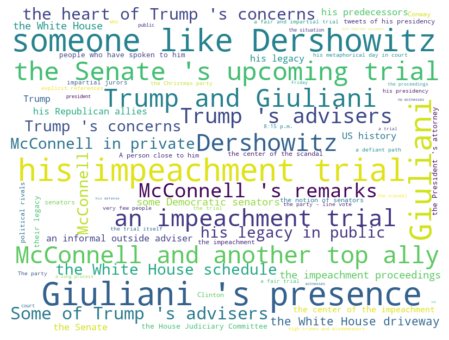

In [34]:
wcdict = defaultdict()

X = []
y = []
for e in selected_texts:
  for r in e[2]:
    # wcdict[r[0]]=1-r[1]
    X.append([1-r[1]])
    y.append(r[0])
print(y)
print(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
for i, v in enumerate(X):
  wcdict[y[i]]=X[i][0]

pp.pprint(wcdict)
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color="white", width=800, height=600,
                      min_font_size=6,font_step=2 )
wordcloud.generate_from_frequencies(wcdict)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()